<a href="https://colab.research.google.com/github/yibing99/GSE-PROJECT/blob/main/gse0103_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Data science project: marketing experiment
This project is to analysis e-commerce website UI experiment

###1.Data wrangling

In [1]:
from google.colab import files

uploaded = files.upload()

Saving BAexperiment.csv to BAexperiment.csv
Saving BAusers.csv to BAusers.csv


In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the data
experiment=pd.read_csv("BAexperiment.csv")
users=pd.read_csv("BAusers.csv")

In [4]:
# Let's check what the data look like
experiment.head()

,user_id,date,interface,language,channel,ads,device,conversion,condition
0,435134,11/30/19,app,English,SEO,NaN,iPhone,0,0
1,310928,12/4/19,browser,English,Ads,Baidu,Sumsung,0,0
2,836325,11/30/19,app,English,Ads,Google,iPhone,0,0
3,298244,12/4/19,browser,English,Referral,NaN,Sumsung,0,0
4,614947,12/4/19,app,English,Ads,Baidu,iPhone,0,1


In [5]:
users.head()

,user_id,sex,age,state
0,492780,Female,21,New Jersey
1,227537,Female,21,Florida
2,83980,Female,18,California
3,375992,Female,19,Pennsylvania
4,597861,Male,20,Florida


In [6]:
experiment.info() # check the shape, datatypes, non-null values of a pandas dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453269 entries, 0 to 453268
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     453269 non-null  int64 
 1   date        453269 non-null  object
 2   interface   453269 non-null  object
 3   language    453269 non-null  object
 4   channel     453269 non-null  object
 5   ads         181856 non-null  object
 6   device      453269 non-null  object
 7   conversion  453269 non-null  int64 
 8   condition   453269 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452785 entries, 0 to 452784
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452785 non-null  int64 
 1   sex      452785 non-null  object
 2   age      452785 non-null  int64 
 3   state    452785 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


No missing data exists in users data;

over a half data are missing in 'ads' column of experiment data.

In [8]:
experiment.nunique()

user_id       453269
date               5
interface          2
language           3
channel            3
ads                5
device             7
conversion         2
condition          2
dtype: int64

In [9]:
users.nunique()

user_id    452785
sex             2
age            52
state          17
dtype: int64

No duplicate user_id exists in experiment data and users data; however, there are more users in experiment data than in users data.


In [10]:
# inner join the two datasets
df= experiment.merge(users, on=['user_id'])# pd.merge(experiment, users, on=['user_id'])
df.head()

,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
0,435134,11/30/19,app,English,SEO,NaN,iPhone,0,0,Female,18,Texas
1,310928,12/4/19,browser,English,Ads,Baidu,Sumsung,0,0,Male,28,Massachusetts
2,836325,11/30/19,app,English,Ads,Google,iPhone,0,0,Female,24,California
3,298244,12/4/19,browser,English,Referral,NaN,Sumsung,0,0,Male,34,Michigan
4,614947,12/4/19,app,English,Ads,Baidu,iPhone,0,1,Female,18,California


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452733 entries, 0 to 452732
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     452733 non-null  int64 
 1   date        452733 non-null  object
 2   interface   452733 non-null  object
 3   language    452733 non-null  object
 4   channel     452733 non-null  object
 5   ads         181640 non-null  object
 6   device      452733 non-null  object
 7   conversion  452733 non-null  int64 
 8   condition   452733 non-null  int64 
 9   sex         452733 non-null  object
 10  age         452733 non-null  int64 
 11  state       452733 non-null  object
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


In [12]:
df.describe()

,user_id,conversion,condition,age
count,452733.000000,452733.000000,452733.000000,452733.000000
mean,499947.117970,0.049552,0.476484,27.130810
std,288678.018612,0.217019,0.499447,6.776542
min,1.000000,0.000000,0.000000,18.000000
25%,249831.000000,0.000000,0.000000,22.000000
50%,500014.000000,0.000000,0.000000,26.000000
75%,749541.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [13]:
# check whether there are outliers in 'age' feature
df['age'].sort_values()

0         18
262107    18
262072    18
262050    18
262049    18
          ..
247538    65
348599    66
177218    67
78403     68
9072      70
Name: age, Length: 452733, dtype: int64

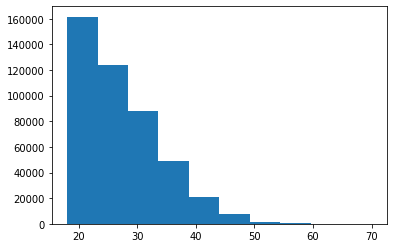

In [14]:
plt.hist(df['age'])
plt.show()

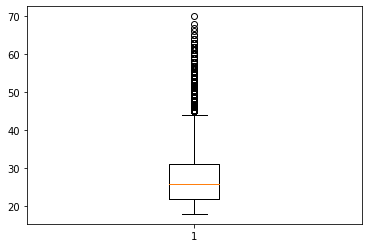

In [15]:
plt.boxplot(df['age'])
plt.show()

### 2.EDA(Exploratory Data Analysis)

First, for categorical features including date, let's check whether the number of users are equal in treatment and control conditions.

In [16]:
df.groupby(['date', 'condition'])['conversion'].count().reset_index()

,date,condition,conversion
0,11/30/19,0,37092
1,11/30/19,1,33834
2,12/1/19,0,37062
3,12/1/19,1,33833
4,12/2/19,0,37058
5,12/2/19,1,33507
6,12/3/19,0,51994
7,12/3/19,1,47371
8,12/4/19,0,73807
9,12/4/19,1,67175


In [17]:
cat_cols = [c for c in df.columns if df[c].dtype != 'int64']
cat_cols

['date', 'interface', 'language', 'channel', 'ads', 'device', 'sex', 'state']

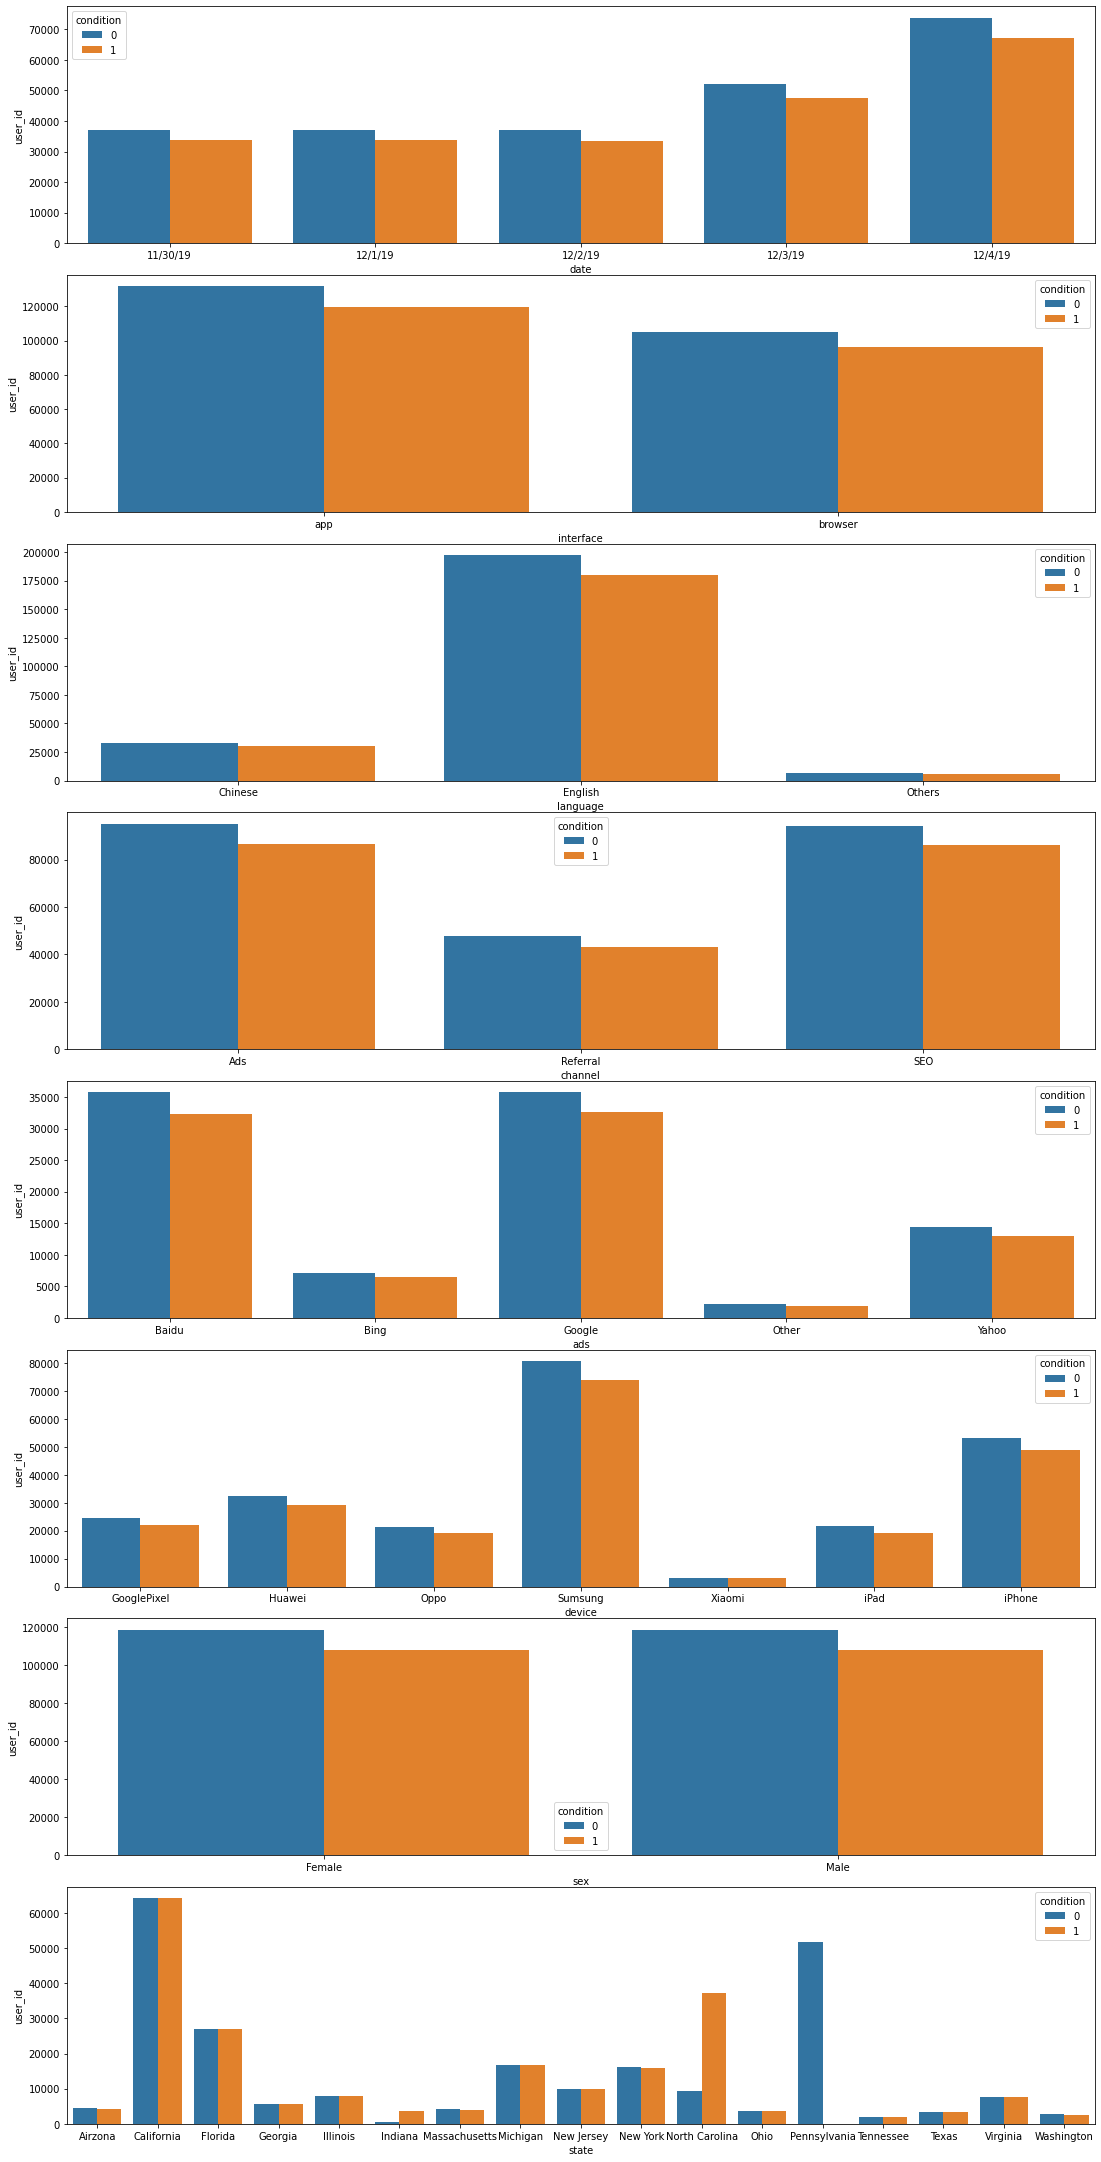

In [18]:
fig, ax = plt.subplots(8, 1, figsize = [15, 30])
fig.tight_layout()

for i in range(8):
  gdf = df.groupby([cat_cols[i], 'condition'])['user_id'].count().reset_index()
  sns.barplot(x=cat_cols[i], y='user_id', hue='condition', data=gdf, ax=ax[i])

Some findings from these plots:

1.   For most features, the number of users is equal in treatment and control groups.
2.   The number of users from some states is not equal in treatment and control groups: most users from North Carolina and Indiana were assigned to treatment condition (1), and all users from Pennsylvania were assigned to control condition (0).
3.   Some problem may have occurred in randomization for states.


Next let's compare the mean conversion rate by each categorical feature of treatment and control conditions.

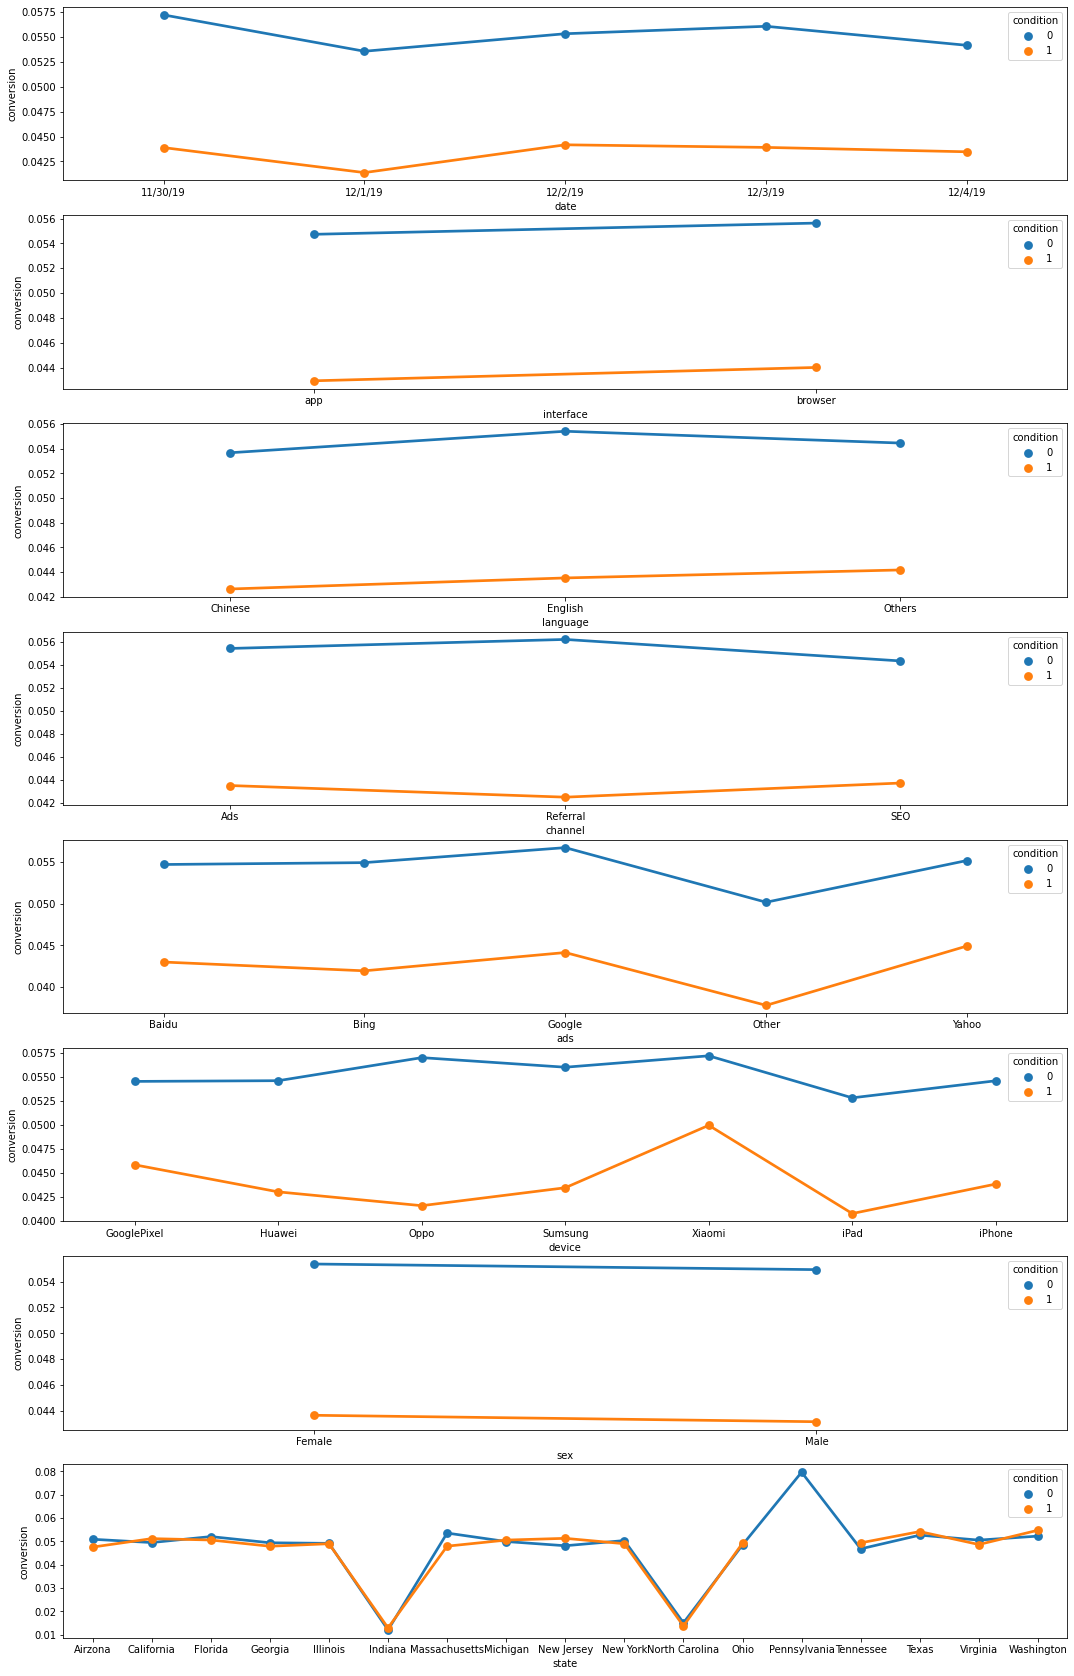

In [19]:
fig, ax = plt.subplots(8, 1, figsize = [18, 30])

for i in range(8):
  gdf = df.groupby([cat_cols[i], 'condition'])['conversion'].mean().reset_index()
  sns.pointplot(x=cat_cols[i], y='conversion', hue='condition', data=gdf, ax=ax[i])

Some findings:


1.   For most categorical features except for state, the mean conversion rate of treatment condition is constantly lower than that of control condition.
2.   For all states except for Pennsylvania, the mean conversion rates of both two conditions are very close.
3.   Pennsylvania has the highest mean conversion rate among all states, but it doesn't appear in treatment group. 
4.   Mean conversion rates of Indiana and North Carolina are much lower than other states, which have consistently shown mean conversion rates of about 5%.



Finally, let's check whether any age difference exists between the two conditions.

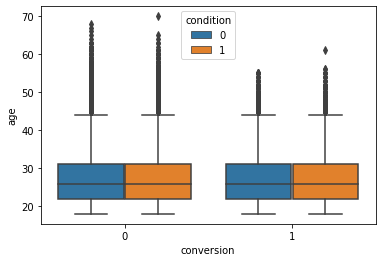

In [20]:
fig = sns.boxplot(x='conversion', y='age', hue='condition', data=df)

Some findings:


1.   The boxplots from two conditions are nearly the same.
2.   There are less age outliers in users who converted, i.e. less elder users.



In [21]:
#convert date to datetime
df['date']=pd.to_datetime(df['date'])

In [22]:
# control conversion rate by device type
df.loc[df.condition==0].groupby('device')['conversion'].mean()

device
GooglePixel    0.054511
Huawei         0.054586
Oppo           0.056981
Sumsung        0.055985
Xiaomi         0.057170
iPad           0.052804
iPhone         0.054575
Name: conversion, dtype: float64

In [23]:
#test conversion rate by state,sort descending
df.loc[df.condition==0].groupby('state')['conversion'].mean().sort_values(ascending=False)

state
Pennsylvania      0.079656
Massachusetts     0.053567
Texas             0.052678
Washington        0.052256
Florida           0.052056
Airzona           0.050906
Virginia          0.050545
New York          0.050356
Michigan          0.049929
California        0.049498
Georgia           0.049405
Illinois          0.049154
Ohio              0.048493
New Jersey        0.048132
Tennessee         0.046796
North Carolina    0.015079
Indiana           0.012048
Name: conversion, dtype: float64

In [24]:
#test conversion rate by state,sort descending
df.loc[df.condition==1].groupby('state')['conversion'].mean().sort_values(ascending=False)

state
Washington        0.054779
Texas             0.054210
New Jersey        0.051305
California        0.051183
Florida           0.050590
Michigan          0.050557
Tennessee         0.049370
Ohio              0.049229
New York          0.048997
Illinois          0.048995
Virginia          0.048654
Massachusetts     0.047947
Georgia           0.047918
Airzona           0.047551
North Carolina    0.013727
Indiana           0.012917
Name: conversion, dtype: float64

Pennsylvania has the highest conversion rate in control group, but not exist in test group. the experiment has some issue as it didn't test a key state.in the following analysis, I'll exclude PA. we should investigate why PA is missing in the test group.

###3. preliminary t test
we want to make sure we have enough samples in both test and control before conduct the test

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452733 entries, 0 to 452732
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     452733 non-null  int64         
 1   date        452733 non-null  datetime64[ns]
 2   interface   452733 non-null  object        
 3   language    452733 non-null  object        
 4   channel     452733 non-null  object        
 5   ads         181640 non-null  object        
 6   device      452733 non-null  object        
 7   conversion  452733 non-null  int64         
 8   condition   452733 non-null  int64         
 9   sex         452733 non-null  object        
 10  age         452733 non-null  int64         
 11  state       452733 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 64.9+ MB


In [26]:
df.loc[df.state!='Pennsylvania'].groupby('condition').count()

,user_id,date,interface,language,channel,ads,device,conversion,sex,age,state
condition,,,,,,,,,,,
0,185253,185253,185253,185253,185253,74329,185253,185253,185253,185253,185253
1,215720,215720,215720,215720,215720,86428,215720,215720,215720,215720,215720


In [27]:
#pennsylvania only have users in control group; so exclude them from data
df=df.loc[df.state!='Pennsylvania']
#t-test of test and control for conversion rate 
test=stats.ttest_ind(df[df.condition==1]['conversion'],df[df.condition==0]['conversion'],equal_var=False) # independent two samples

Ttest_indResult(statistic=-7.348809649672405, pvalue=2.0037258144272322e-13)

In [28]:
print("the prelinminary t-test p value is:", test.pvalue, "; and t-statistic is :", test.statistic)

the prelinminary t-test p value is: 2.0037258144272322e-13 ; and t-statistic is : -7.348809649672405


In [29]:
df.groupby('condition')['conversion'].mean()

condition
0    0.048291
1    0.043413
Name: conversion, dtype: float64

##preliminary t-test show the new UI has a stats-sig regression than old UI in control. the conversion rate of control group is 5% higher. there are a couple of hypothesis we can think of :
1. new UI is really worse
2. there is more bias associated with experiment data
3. they didn't collect enough data in some segments

we'll continue to investigate the experiment data, to see if users in test and control groups are randomly sampled with any bias, and sufficient in necessary group segments. before deriving any conclusions about the t-test results. only when exluded hypothesis 2) and 3), we can take hypothesis 1), and have learnings in future UI design and product from this experiment.


###4.Exam experiment bias:

4.1 by time

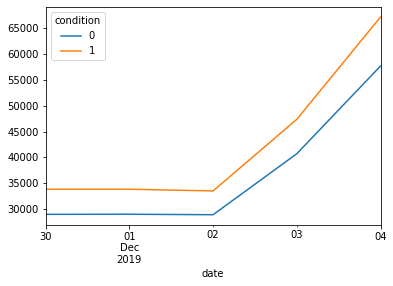

In [30]:
#let's check number of samples and conversion rate day by day
# to see if there is some wilderness in someday by comparing number of samples and conversion rate between test and control groups overtime
Temp=df.groupby(['date','condition'])['user_id'].count().unstack().plot()

In [31]:
df.groupby('date')['conversion'].agg(ratio = lambda a:a[df.condition==1].mean()/a[df.condition==0].mean())

,ratio
date,
2019-11-30,0.858002
2019-12-01,0.894586
2019-12-02,0.911110
2019-12-03,0.891067
2019-12-04,0.923195


##Conclusion:
1.treatment group is consistently worse than the control group
2.the experiment has not ran for 1-2 weeks to capture weekly pattern. 12/03-0 has more traffic, probably due to weekly parrtern. There is some limitation about the date. 

4.2 device

In [32]:
device_count = df.groupby('device')['condition'].agg(count_treatment=lambda a:len(a[a==1]), count_control=lambda  a:len(a[a==0]))

In [33]:
device_count*100/device_count.sum()

,count_treatment,count_control
device,,
GooglePixel,10.263768,10.308605
Huawei,13.541628,13.696944
Oppo,8.971352,8.973134
Sumsung,34.345448,34.130082
Xiaomi,1.336455,1.346267
iPad,8.946319,9.218744
iPhone,22.595031,22.326224


Conclusion: treatment and control are well balanced and comparable, no bias in device

Since our EDA suggested some abnormal data patterns of North Carolina and Indiana: treatment and control conditions of the two states are unbalanced, and the mean conversion rates are much lower than any other state. These may lead to biases in our t-test, and we should exclude users from the two states and see whether conversion rate differences remain significant.

In [38]:
df_new = df[~df['state'].isin(['Indiana', 'North Carolina'])]
df_new

,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
0,435134,2019-11-30,app,English,SEO,NaN,iPhone,0,0,Female,18,Texas
1,310928,2019-12-04,browser,English,Ads,Baidu,Sumsung,0,0,Male,28,Massachusetts
2,836325,2019-11-30,app,English,Ads,Google,iPhone,0,0,Female,24,California
3,298244,2019-12-04,browser,English,Referral,NaN,Sumsung,0,0,Male,34,Michigan
4,614947,2019-12-04,app,English,Ads,Baidu,iPhone,0,1,Female,18,California
...,...,...,...,...,...,...,...,...,...,...,...,...
452725,330151,2019-12-01,app,English,Ads,Baidu,Oppo,0,1,Male,21,Georgia
452726,380950,2019-11-30,app,English,Ads,Google,iPad,1,0,Male,23,Florida
452727,853589,2019-12-03,app,English,SEO,NaN,iPhone,0,1,Male,50,Michigan
452730,310774,2019-12-01,app,English,Ads,Google,iPhone,0,0,Female,37,California


In [44]:
test=stats.ttest_ind(df_new[df_new.condition==1]['conversion'],df_new[df_new.condition==0]['conversion'],equal_var=False)
test

Ttest_indResult(statistic=0.36340782173835057, pvalue=0.7163004791299912)

The conversion rate of treatment group is slightly higher than control group when NC and IN data are excluded, but such difference is not significant.

In [40]:
df_new[df_new['condition']==1]['conversion'].mean()

0.05041458610105823

In [41]:
df_new[df_new['condition']==0]['conversion'].mean()

0.050146164673166675